In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
#数据是否需要标准化
scale = True

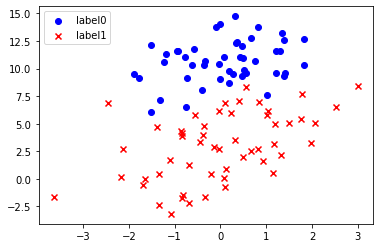

In [8]:
#载入数据
data = np.genfromtxt("LR-testSet.csv",delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    #切分不同类型的数据
    for i in range(len(x_data)):
        if y_data[i] == 0 :
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    #画图
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    #画图例
    plt.legend(handles = [scatter0,scatter1],labels = ['label0','label1'],loc='best')
    
    
plot()
plt.show()

In [10]:
#数据处理，添加偏置项
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]

print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
#给样本添加偏置项
X_data = np.concatenate((np.ones((100,1)),x_data),axis=1)

(100, 2)
(100, 1)


In [16]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat,yMat,ws):
    left = np.multiply(yMat,np.log(sigmoid(xMat * ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat*ws)))
    return np.sum(left + right) / -(len(xMat))

def gradAscent(xArr, yArr):
    
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.001
    epochs = 10000
    costList = []
    # 计算数据行列数
    # 行代表数据个数，列代表权值个数
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):             
        # xMat和weights矩阵相乘
        h = sigmoid(xMat*ws)   
        # 计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad 
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [17]:
# 训练模型，得到权值和cost值的变化
ws,costList = gradAscent(X_data, y_data)
print(ws)

[[ 1.        ]
 [ 0.30816757]
 [-1.76171512]]


In [18]:
if scale == False:
    # 画图决策边界
    plot()
    x_test = [[-4],[3]]
    y_test = (-ws[0] - x_test*ws[1])/ws[2]
    plt.plot(x_test, y_test, 'k')
    plt.show()

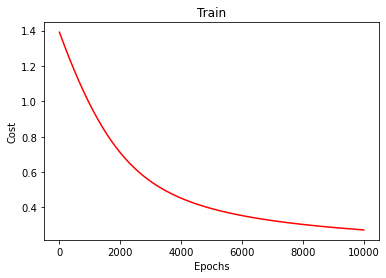

In [19]:
# 画图 loss值的变化
x = np.linspace(0,10000,201)
plt.plot(x, costList, c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [20]:
# 预测
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(X_data, ws)

print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        47
         1.0       1.00      0.92      0.96        53

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

